Blue model: mistral:latest
Red  model: llama3.2:latest

 [mistral:latest] sending prompt (10 lines)…
 [Home](/README.md) / [Tutorials](./tutorials.md)

# Tutorials for SOLIDITY by Adeel Raoof, MSCS (Masters in Computer Science)

> **Note:** This repo is designed to help you understand the concepts of Solidity and Smart Contracts from the ground up. I've been learning these things too, so let me know if there are any typos or mistakes! Also please fork this repository if you make improvements so that others can benefit from them as well.
>
> **Disclaimer:** I am not an expert in Solidity or Smart Contracts. These tutorials only reflect my current understanding of the subject and should be verified with other sources before being relied upon in production.

## What is a blockchain?
A blockchain is a type of database that stores data across many computers, making it highly resistant to hacking and data corruption.

## What is Solidity?
Solidity is a high-level programming language for imp

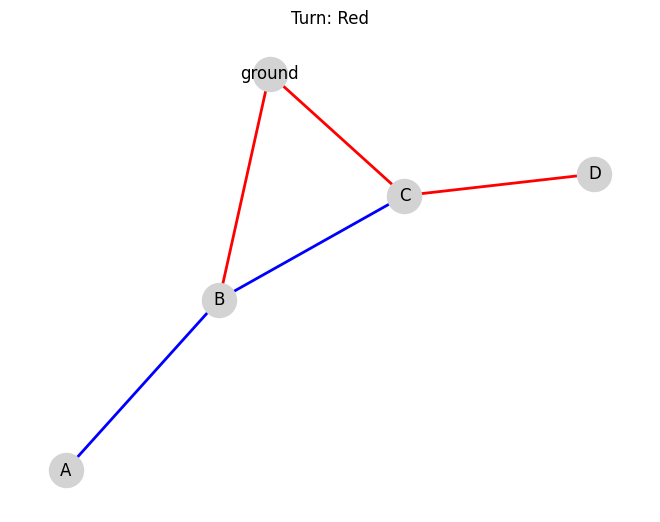


 [llama3.2:latest] sending prompt (9 lines)…

 [llama3.2:latest] answered in 2.8s → “”
 llama3.2:latest gave invalid move “”. Taking random legal edge 4.

[01] llama3.2:latest removes edge 4: C-D


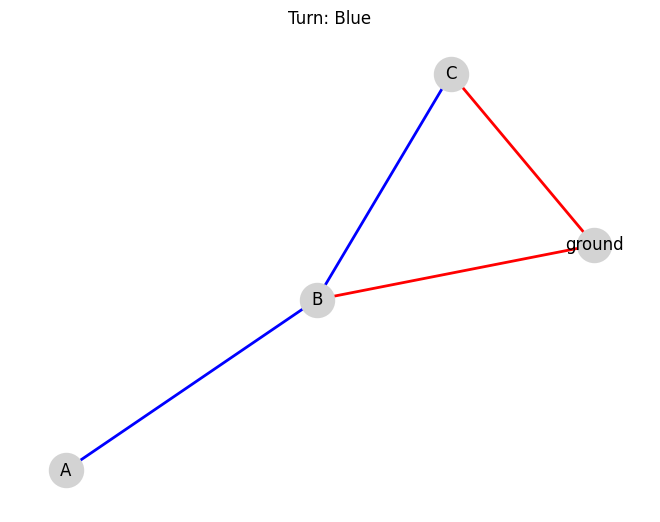


 [mistral:latest] sending prompt (8 lines)…
 The Sovereign Military Order of Malta has its origins in the Holy Land where, as early as 1048, it provided assistance to pilgrims and the sick. In 1113, Blessed Gerard Sagredo founded a hospital in Jerusalem dedicated to Saint John the Baptist (later renamed the Order of St. John), making it the first institution of its kind that welcomed pilgrims, the sick and the poor without any distinction.

In 1120, with the approval of Pope Honorius II, the Knights of St. John took a solemn vow of poverty, chastity, obedience and service to the Church and the Christian faithful, thus becoming the first religious military Order in history. The Hospital of St. John became a reference point for assistance and charity throughout the crusader territories.

The hospital was destroyed by the Ayyubid Sultan Saladin following his conquest of Jerusalem in 1187. However, it was rebuilt by the Knights in 1204 within the walls of the city of Acre, which became th

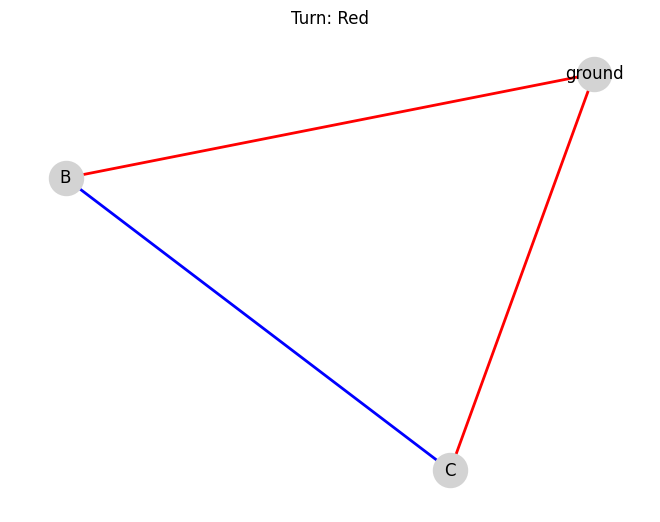


 [llama3.2:latest] sending prompt (7 lines)…

 [llama3.2:latest] answered in 1.6s → “”
 llama3.2:latest gave invalid move “”. Taking random legal edge 0.

[03] llama3.2:latest removes edge 0: ground-B


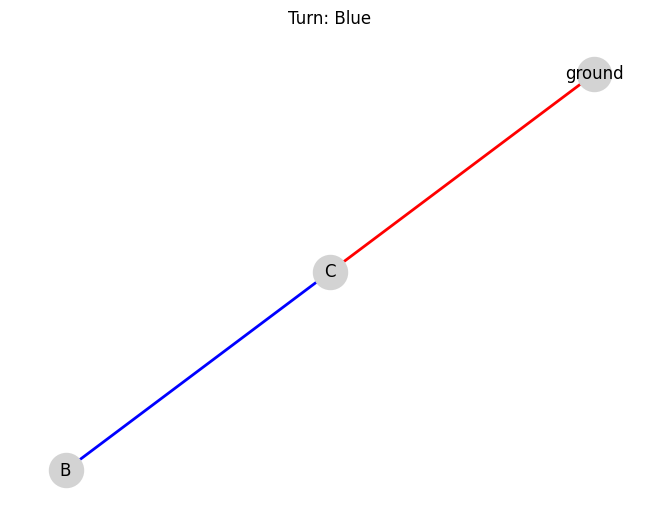


 [mistral:latest] sending prompt (6 lines)…
3:00 PM - 4:15 PM

Today’s global economy is characterized by a high degree of interconnectedness, requiring international cooperation and coordination to address pressing global challenges.  The COVID-19 pandemic has brought into sharp focus the need for such collaboration, from sharing data on mutations of the virus to coordinating responses to vaccine distribution.  However, cooperation and coordination also require trust, which can be fragile and easily eroded by actions that betray shared principles and commitments.   In this panel discussion, we will consider the challenges and opportunities for multilateral cooperation in today’s global economy, with a particular focus on the role of international organizations and other multilateral institutions in addressing pressing global issues such as health crises, economic inequality, climate change, and cybersecurity.

Moderator: Dr. David A. Lake, Dean, The Fletcher School at Tufts Universit

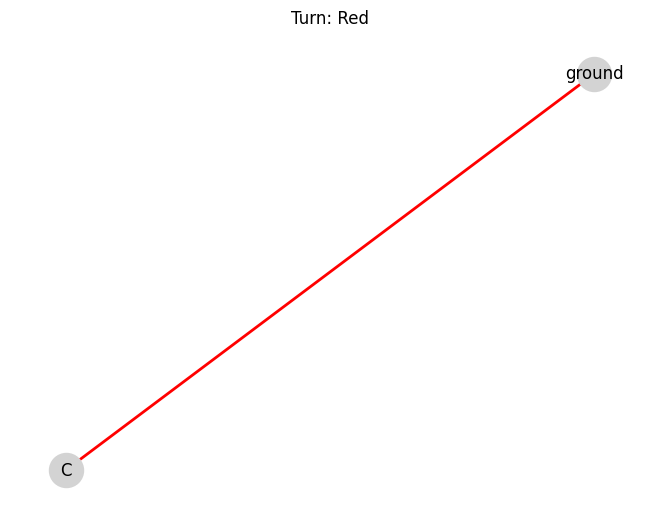


 [llama3.2:latest] sending prompt (5 lines)…

 [llama3.2:latest] answered in 1.7s → “”
 llama3.2:latest gave invalid move “”. Taking random legal edge 0.

[05] llama3.2:latest removes edge 0: ground-C


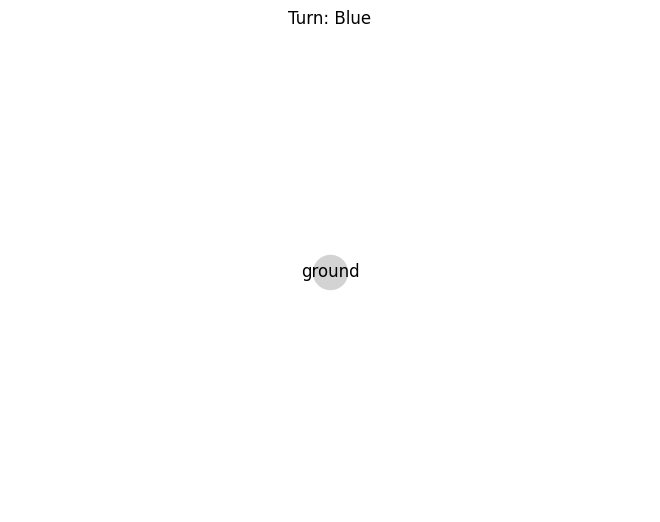


 Red (llama3.2:latest) wins – opponent has no move.


In [ ]:
import time, random, re
import networkx as nx
import matplotlib.pyplot as plt
import ollama         

BLUE_MODEL = "mistral:latest"  
RED_MODEL  = "llama3.2:latest"   
DELAY      = 0.2        

class HackenbushGame:
    def __init__(self, edges):
        self.G = nx.Graph()
        self.G.add_node("ground") # ground node
        for u, v, col in edges:
            self.G.add_edge(u, v, color=col)
        self.turn = "B" # Blue always starts the game         

    def legal_edges(self):
        return [(i, u, v) # list of legal edges (index, node1, node2)
                for i, (u, v, d)  # d is edge data, which contains color info
                in enumerate(self.G.edges(data=True)) # enumerate edges
                if d["color"] == self.turn] # filters edges by current color

    def remove_edge(self, idx):
        u, v, _ = list(self.G.edges(data=True))[idx] # get edge data by its index
        self.G.remove_edge(u, v) # remove edge from graph

        for node in (u, v):
            if node != "ground" and not nx.has_path(self.G, "ground", node): # check if node is connected to ground
                self.G.remove_nodes_from(nx.node_connected_component(self.G, node)) # remove disconnected nodes

        self.turn = "R" if self.turn == "B" else "B" # swith turn

    def is_over(self):
        return len(self.legal_edges()) == 0 # no legal edges left

    def ascii_state(self):
        rows = []
        for i, (u, v, d) in enumerate(self.G.edges(data=True)): 
            rows.append(f"{i:2d}: {u}-{v}  ({'Blue' if d['color']=='B' else 'Red'})") # format edge info
        return "\n".join(rows)

    def draw(self): # visualize the game state
        colors = ["blue" if d["color"] == "B" else "red"
                  for _, _, d in self.G.edges(data=True)]
        nx.draw(self.G, nx.spring_layout(self.G, seed=1),
                with_labels=True, edge_color=colors, node_color="lightgray",
                node_size=600, width=2)
        plt.title(f"Turn: {'Blue' if self.turn=='B' else 'Red'}")
        plt.show()

INT_RE = re.compile(r"-?\d+") # regex pattern to get integer from LLM response (sometimes artifacts may occur)

def ensure_model(model_name: str):
    """
    Ensures if the selected model exists locally in ollama list.
    """
    try:
        raw = ollama.list()
    except Exception as e:
        print(f" Can't fetch ollama list:: {e}")
        raw = {}

    local_names = set()
    models_block = raw.get("models", raw)         
    if isinstance(models_block, list):
        for m in models_block:
            if isinstance(m, dict):
                local_names.add(m.get("name") or m.get("model") or "")
            else:                                
                local_names.add(str(m))
    elif isinstance(models_block, dict):
        local_names.add(models_block.get("name") or models_block.get("model", ""))
    else:
        pass 
    if model_name not in local_names:
        try:
            ollama.pull(model=model_name)
        except Exception as e:
            raise RuntimeError(f"Pull '{model_name}' doesn't exist locally: {e}")


def query_ollama(model: str, prompt: str, silent=False) -> str:
    """ 
    Sends a prompt to the specified LLM model using Ollama and returns the response.
    """
    ensure_model(model)
    if not silent:
        print(f"\n [{model}] sending prompt ({len(prompt.splitlines())} lines)…")
    t0 = time.time()
    chunks = []
    try:
        for chunk in ollama.chat(
                model=model,
                messages=[{"role": "system", "content": prompt}],
                stream=True):
            token = chunk["message"]["content"]
            chunks.append(token)
            if not silent:
                print(token, end="", flush=True)     
    except Exception as e:
        print(f"\nError contacting {model}: {e}")
        return ""
    if not chunks:
        print(f"\n{model} returned no content.")
        return ""
    txt = "".join(chunks).strip()
    dt  = time.time() - t0
    print(f"\n [{model}] answered in {dt:.1f}s → “{txt}”")
    return txt

def extract_index(text: str, legal):
    """ Extracts an integer index from LLM response using regex"""
    m = INT_RE.search(text)
    if m:
        val = int(m.group())
        if val in legal:
            return val
    return None

def llm_move(game, model_name):
    legal = game.legal_edges()
    if not legal:
        return None
    legal_ids = [i for i, _, _ in legal]

    prompt = (
        "You are playing Red–Blue Hackenbush. "
        f"It's your turn ({'Blue' if game.turn=='B' else 'Red'}).\n"
        "Return ONLY one integer – the index of the edge you remove. No explanation.\n\n"
        "Edges (index: endpoints (owner)):\n"
        + game.ascii_state()
    )
    raw = query_ollama(model_name, prompt)
    move = extract_index(raw, legal_ids)
    if move is None:
        move = random.choice(legal_ids)
        print(f" {model_name} gave invalid move “{raw}”. Taking random legal edge {move}.")
    return move

start_edges = [
    ("ground", "A", "B"),
    ("ground", "B", "R"),
    ("A", "B", "B"),
    ("B", "C", "B"),
    ("C", "ground", "R"),
    ("C", "D", "R"),
]

game = HackenbushGame(start_edges)
step = 0
print("Blue model:", BLUE_MODEL)
print("Red  model:", RED_MODEL)

while True:
    if game.is_over():
        winner = "Red ("+RED_MODEL+")" if game.turn == "B" else "Blue ("+BLUE_MODEL+")"
        print(f"\n {winner} wins – opponent has no move.")
        break

    model = BLUE_MODEL if game.turn == "B" else RED_MODEL
    idx = llm_move(game, model)
    u, v, _ = list(game.G.edges(data=True))[idx]
    print(f"\n[{step:02d}] {model} removes edge {idx}: {u}-{v}")
    game.remove_edge(idx)
    step += 1
    time.sleep(DELAY)
    game.draw()  
